Single-channel CSC With Lateral Inhibition / No Self Inhibition
===============================================================

This example demonstrates solving a convolutional sparse coding problem with a greyscale signal

  $$\mathrm{argmin}_\mathbf{x} \; \frac{1}{2} \left\| \sum_m \mathbf{d}_m * \mathbf{x}_{m} - \mathbf{s} \right\|_2^2 + \lambda \sum_m \| \mathbf{x}_{m} \|_1 + \sum_m \mathbf{\omega}^T_m \| \mathbf{x}_m \| + \sum_m \mathbf{z}^T_m \|
  \mathbf{x}_m \| \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, $\mathbf{s}$ is the input image, and $\mathbf{\omega}^T_m$ and $\mathbf{z}^T_m$
are inhibition weights corresponding to lateral and self inhibition, respectively (see [admm.cbpdnin.ConvBPDNInhib](http://sporco.rtfd.org/en/latest/modules/sporco.admm.cbpdnin.html#sporco.admm.cbpdnin.ConvBPDNInhib)).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco import util
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.admm import cbpdnin

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True, gray=True,
                                 idxexp=np.s_[160:416, 60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = util.tikhonov_filter(img, fltlmbd, npd)

Load dictionary and display it.

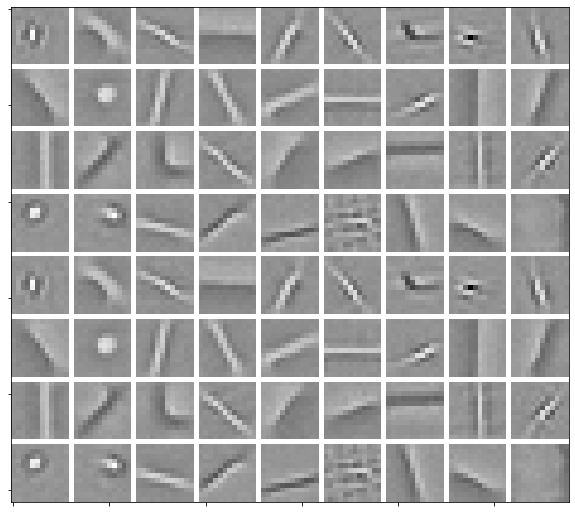

In [4]:
D = util.convdicts()['G:12x12x36']
# Repeat the dictionary twice, adding noise to each respective pair
D = np.append(D + 0.01 * np.random.randn(*D.shape),
              D + 0.01 * np.random.randn(*D.shape), axis=-1)
plot.imview(util.tiledict(D), fgsz=(10, 10))

Set [admm.cbpdnin.ConvBPDNInhib](http://sporco.rtfd.org/en/latest/modules/sporco.admm.cbpdnin.html#sporco.admm.cbpdnin.ConvBPDNInhib) solver options.

In [5]:
lmbda = 5e-2
mu = 5e-2
opt = cbpdnin.ConvBPDNInhib.Options({'Verbose': True, 'MaxMainIter': 200,
                                     'RelStopTol': 5e-3, 'AuxVarObj': False})

Initialise and run CSC solver.

In [6]:
# Create the Ng x M grouping matrix, where Ng is the number of groups,
# and M is the number of dictionary elements. A non-zero entry at
# Wg(n, m), means that element m belongs to group n. Our dictionary
# was repeated contiguously, so elements i and i + 36 are paired for
# i = 0, ..., 35.
Wg = np.append(np.eye(36), np.eye(36), axis=-1)
# We additionally choose a rectangular inhibition window of sample
# diameter 12.
b = cbpdnin.ConvBPDNInhib(D, sh, Wg, 12, ('boxcar'),
                          lmbda, mu, None, opt, dimK=0)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     RegLat    RegSelf   r         s         ρ       
------------------------------------------------------------------------------------


   0  7.62e+01  2.38e-01  1.50e+03  2.19e+01  0.00e+00  9.81e-01  6.27e-02  3.50e+00


   1  6.92e+01  1.39e+00  1.32e+03  3.59e+01  0.00e+00  8.52e-01  2.06e-01  3.50e+00


   2  6.01e+01  2.69e+00  1.10e+03  4.52e+01  0.00e+00  4.25e-01  2.85e-01  5.98e+00


   3  5.91e+01  3.47e+00  1.04e+03  6.93e+01  0.00e+00  2.75e-01  2.36e-01  5.98e+00


   4  5.83e+01  3.73e+00  1.01e+03  8.57e+01  0.00e+00  2.38e-01  1.68e-01  5.42e+00


   5  5.25e+01  4.03e+00  8.82e+02  8.68e+01  0.00e+00  2.05e-01  1.38e-01  5.42e+00


   6  4.89e+01  4.42e+00  8.02e+02  8.71e+01  0.00e+00  1.79e-01  1.09e-01  5.42e+00


   7  4.70e+01  4.77e+00  7.55e+02  9.00e+01  0.00e+00  1.49e-01  8.85e-02  5.42e+00


   8  4.54e+01  5.00e+00  7.13e+02  9.43e+01  0.00e+00  1.21e-01  7.82e-02  5.42e+00


   9  4.42e+01  5.13e+00  6.83e+02  9.79e+01  0.00e+00  1.02e-01  7.11e-02  5.42e+00


  10  4.34e+01  5.20e+00  6.64e+02  1.00e+02  0.00e+00  8.87e-02  6.15e-02  5.42e+00


  11  4.23e+01  5.27e+00  6.39e+02  1.00e+02  0.00e+00  7.86e-02  5.32e-02  5.42e+00


  12  4.06e+01  5.36e+00  6.05e+02  9.93e+01  0.00e+00  6.93e-02  4.97e-02  5.42e+00


  13  3.94e+01  5.45e+00  5.81e+02  9.87e+01  0.00e+00  6.15e-02  4.60e-02  5.42e+00


  14  3.88e+01  5.52e+00  5.67e+02  9.90e+01  0.00e+00  5.50e-02  4.10e-02  5.42e+00


  15  3.83e+01  5.57e+00  5.55e+02  9.90e+01  0.00e+00  4.93e-02  3.74e-02  5.42e+00


  16  3.76e+01  5.60e+00  5.42e+02  9.82e+01  0.00e+00  4.43e-02  3.53e-02  5.42e+00


  17  3.70e+01  5.61e+00  5.30e+02  9.72e+01  0.00e+00  4.03e-02  3.30e-02  5.42e+00


  18  3.65e+01  5.63e+00  5.21e+02  9.60e+01  0.00e+00  3.70e-02  3.10e-02  5.42e+00


  19  3.59e+01  5.64e+00  5.10e+02  9.46e+01  0.00e+00  3.40e-02  2.96e-02  5.42e+00


  20  3.55e+01  5.66e+00  5.03e+02  9.32e+01  0.00e+00  3.36e-02  2.82e-02  4.88e+00


  21  3.52e+01  5.66e+00  4.99e+02  9.18e+01  0.00e+00  3.16e-02  2.67e-02  4.88e+00


  22  3.50e+01  5.67e+00  4.96e+02  9.02e+01  0.00e+00  3.16e-02  2.57e-02  4.45e+00


  23  3.48e+01  5.66e+00  4.94e+02  8.82e+01  0.00e+00  3.00e-02  2.47e-02  4.45e+00


  24  3.46e+01  5.65e+00  4.93e+02  8.62e+01  0.00e+00  2.86e-02  2.40e-02  4.45e+00


  25  3.43e+01  5.64e+00  4.90e+02  8.40e+01  0.00e+00  2.72e-02  2.34e-02  4.45e+00


  26  3.40e+01  5.62e+00  4.86e+02  8.18e+01  0.00e+00  2.78e-02  2.29e-02  4.03e+00


  27  3.38e+01  5.61e+00  4.84e+02  7.95e+01  0.00e+00  2.67e-02  2.24e-02  4.03e+00


  28  3.35e+01  5.59e+00  4.82e+02  7.71e+01  0.00e+00  2.58e-02  2.19e-02  4.03e+00


  29  3.33e+01  5.58e+00  4.81e+02  7.46e+01  0.00e+00  2.66e-02  2.12e-02  3.68e+00


  30  3.31e+01  5.57e+00  4.79e+02  7.19e+01  0.00e+00  2.58e-02  2.06e-02  3.68e+00


  31  3.29e+01  5.56e+00  4.78e+02  6.90e+01  0.00e+00  2.48e-02  2.02e-02  3.68e+00


  32  3.27e+01  5.55e+00  4.77e+02  6.61e+01  0.00e+00  2.40e-02  1.98e-02  3.68e+00


  33  3.25e+01  5.54e+00  4.76e+02  6.32e+01  0.00e+00  2.30e-02  1.92e-02  3.68e+00


  34  3.23e+01  5.53e+00  4.75e+02  6.06e+01  0.00e+00  2.21e-02  1.86e-02  3.68e+00


  35  3.21e+01  5.51e+00  4.74e+02  5.81e+01  0.00e+00  2.14e-02  1.82e-02  3.68e+00


  36  3.18e+01  5.50e+00  4.71e+02  5.54e+01  0.00e+00  2.06e-02  1.77e-02  3.68e+00


  37  3.16e+01  5.49e+00  4.69e+02  5.28e+01  0.00e+00  2.12e-02  1.73e-02  3.33e+00


  38  3.14e+01  5.48e+00  4.67e+02  5.02e+01  0.00e+00  2.04e-02  1.68e-02  3.33e+00


  39  3.12e+01  5.47e+00  4.66e+02  4.79e+01  0.00e+00  1.98e-02  1.62e-02  3.33e+00


  40  3.10e+01  5.47e+00  4.65e+02  4.55e+01  0.00e+00  1.91e-02  1.56e-02  3.33e+00


  41  3.08e+01  5.46e+00  4.64e+02  4.33e+01  0.00e+00  1.83e-02  1.50e-02  3.33e+00


  42  3.06e+01  5.45e+00  4.63e+02  4.11e+01  0.00e+00  1.78e-02  1.46e-02  3.33e+00


  43  3.05e+01  5.44e+00  4.61e+02  3.90e+01  0.00e+00  1.72e-02  1.42e-02  3.33e+00


  44  3.03e+01  5.44e+00  4.60e+02  3.69e+01  0.00e+00  1.66e-02  1.40e-02  3.33e+00


  45  3.01e+01  5.43e+00  4.58e+02  3.50e+01  0.00e+00  1.61e-02  1.36e-02  3.33e+00


  46  2.99e+01  5.43e+00  4.57e+02  3.32e+01  0.00e+00  1.66e-02  1.32e-02  3.04e+00


  47  2.98e+01  5.42e+00  4.56e+02  3.16e+01  0.00e+00  1.61e-02  1.28e-02  3.04e+00


  48  2.97e+01  5.42e+00  4.55e+02  3.00e+01  0.00e+00  1.56e-02  1.24e-02  3.04e+00


  49  2.96e+01  5.41e+00  4.54e+02  2.86e+01  0.00e+00  1.50e-02  1.20e-02  3.04e+00


  50  2.94e+01  5.41e+00  4.53e+02  2.72e+01  0.00e+00  1.46e-02  1.17e-02  3.04e+00


  51  2.93e+01  5.40e+00  4.52e+02  2.58e+01  0.00e+00  1.41e-02  1.14e-02  3.04e+00


  52  2.91e+01  5.40e+00  4.50e+02  2.45e+01  0.00e+00  1.37e-02  1.12e-02  3.04e+00


  53  2.90e+01  5.40e+00  4.49e+02  2.32e+01  0.00e+00  1.34e-02  1.10e-02  3.04e+00


  54  2.88e+01  5.40e+00  4.47e+02  2.20e+01  0.00e+00  1.29e-02  1.03e-02  3.04e+00


  55  2.87e+01  5.39e+00  4.46e+02  2.09e+01  0.00e+00  1.24e-02  1.00e-02  3.04e+00


  56  2.86e+01  5.39e+00  4.44e+02  1.99e+01  0.00e+00  1.20e-02  9.69e-03  3.04e+00


  57  2.85e+01  5.39e+00  4.43e+02  1.90e+01  0.00e+00  1.16e-02  9.40e-03  3.04e+00


  58  2.84e+01  5.39e+00  4.41e+02  1.81e+01  0.00e+00  1.12e-02  9.13e-03  3.04e+00


  59  2.83e+01  5.39e+00  4.40e+02  1.72e+01  0.00e+00  1.09e-02  8.82e-03  3.04e+00


  60  2.82e+01  5.39e+00  4.39e+02  1.65e+01  0.00e+00  1.05e-02  8.56e-03  3.04e+00


  61  2.81e+01  5.38e+00  4.38e+02  1.57e+01  0.00e+00  1.02e-02  8.36e-03  3.04e+00


  62  2.80e+01  5.38e+00  4.37e+02  1.50e+01  0.00e+00  9.92e-03  8.22e-03  3.04e+00


  63  2.79e+01  5.38e+00  4.35e+02  1.43e+01  0.00e+00  9.63e-03  8.04e-03  3.04e+00


  64  2.78e+01  5.38e+00  4.34e+02  1.37e+01  0.00e+00  9.37e-03  7.88e-03  3.04e+00


  65  2.77e+01  5.38e+00  4.33e+02  1.31e+01  0.00e+00  9.12e-03  7.73e-03  3.04e+00


  66  2.76e+01  5.38e+00  4.32e+02  1.25e+01  0.00e+00  9.40e-03  7.55e-03  2.77e+00


  67  2.76e+01  5.38e+00  4.31e+02  1.20e+01  0.00e+00  9.18e-03  7.39e-03  2.77e+00


  68  2.75e+01  5.38e+00  4.31e+02  1.15e+01  0.00e+00  8.97e-03  7.17e-03  2.77e+00


  69  2.75e+01  5.38e+00  4.30e+02  1.11e+01  0.00e+00  8.79e-03  6.91e-03  2.77e+00


  70  2.74e+01  5.38e+00  4.30e+02  1.07e+01  0.00e+00  8.53e-03  6.72e-03  2.77e+00


  71  2.73e+01  5.38e+00  4.29e+02  1.03e+01  0.00e+00  8.33e-03  6.52e-03  2.77e+00


  72  2.73e+01  5.38e+00  4.28e+02  9.93e+00  0.00e+00  8.12e-03  6.34e-03  2.77e+00


  73  2.72e+01  5.38e+00  4.27e+02  9.55e+00  0.00e+00  7.90e-03  6.20e-03  2.77e+00


  74  2.72e+01  5.38e+00  4.26e+02  9.19e+00  0.00e+00  7.69e-03  6.05e-03  2.77e+00


  75  2.71e+01  5.38e+00  4.25e+02  8.84e+00  0.00e+00  7.51e-03  5.92e-03  2.77e+00


  76  2.70e+01  5.38e+00  4.25e+02  8.51e+00  0.00e+00  7.32e-03  5.82e-03  2.77e+00


  77  2.70e+01  5.38e+00  4.24e+02  8.20e+00  0.00e+00  7.14e-03  5.64e-03  2.77e+00


  78  2.69e+01  5.38e+00  4.23e+02  7.92e+00  0.00e+00  6.96e-03  5.51e-03  2.77e+00


  79  2.69e+01  5.38e+00  4.22e+02  7.65e+00  0.00e+00  6.80e-03  5.41e-03  2.77e+00


  80  2.68e+01  5.38e+00  4.22e+02  7.39e+00  0.00e+00  6.59e-03  5.23e-03  2.77e+00


  81  2.68e+01  5.38e+00  4.21e+02  7.15e+00  0.00e+00  6.43e-03  5.13e-03  2.77e+00


  82  2.67e+01  5.38e+00  4.20e+02  6.92e+00  0.00e+00  6.29e-03  5.05e-03  2.77e+00


  83  2.67e+01  5.38e+00  4.19e+02  6.70e+00  0.00e+00  6.14e-03  4.95e-03  2.77e+00


  84  2.66e+01  5.38e+00  4.19e+02  6.49e+00  0.00e+00  6.01e-03  4.85e-03  2.77e+00


  85  2.66e+01  5.38e+00  4.18e+02  6.28e+00  0.00e+00  5.88e-03  4.75e-03  2.77e+00


  86  2.65e+01  5.38e+00  4.17e+02  6.09e+00  0.00e+00  5.77e-03  4.66e-03  2.77e+00


  87  2.65e+01  5.38e+00  4.17e+02  5.90e+00  0.00e+00  5.65e-03  4.55e-03  2.77e+00


  88  2.65e+01  5.38e+00  4.16e+02  5.73e+00  0.00e+00  5.50e-03  4.45e-03  2.77e+00


  89  2.64e+01  5.38e+00  4.15e+02  5.56e+00  0.00e+00  5.36e-03  4.34e-03  2.77e+00


  90  2.64e+01  5.38e+00  4.15e+02  5.42e+00  0.00e+00  5.22e-03  4.22e-03  2.77e+00


  91  2.64e+01  5.38e+00  4.14e+02  5.28e+00  0.00e+00  5.08e-03  4.12e-03  2.77e+00


  92  2.63e+01  5.38e+00  4.14e+02  5.15e+00  0.00e+00  4.97e-03  4.03e-03  2.77e+00
------------------------------------------------------------------------------------
ConvBPDN solve time: 44.43s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 37.30dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

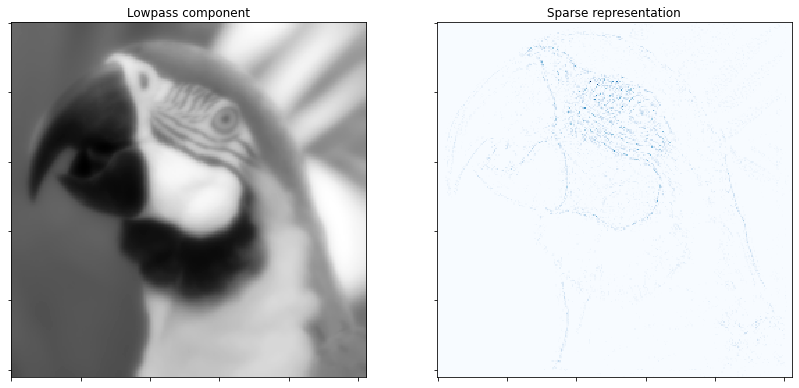

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Show activation of grouped elements column-wise for first four groups.  As mu is lowered, the vertical pairs should look more and more similar.  You will likely need to zoom in to see the activations clearly.

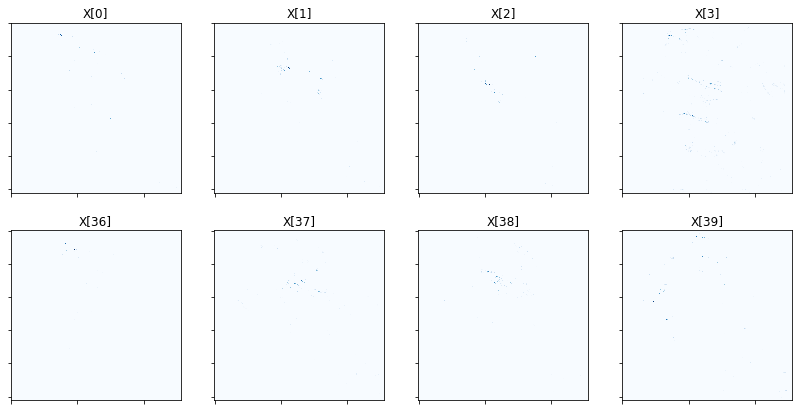

In [9]:
fig = plot.figure(figsize=(14, 7))
for i in range(4):
    plot.subplot(2, 4, i + 1)
    plot.imview(abs(X[:, :, :, :, i]).squeeze(), cmap=plot.cm.Blues,
                title=f'X[{i}]', fig=fig)
    plot.subplot(2, 4, i + 5)
    plot.imview(abs(X[:, :, :, :, i + 36]).squeeze(), cmap=plot.cm.Blues,
                title=f'X[{i+36}]', fig=fig)
fig.show()

Display original and reconstructed images.

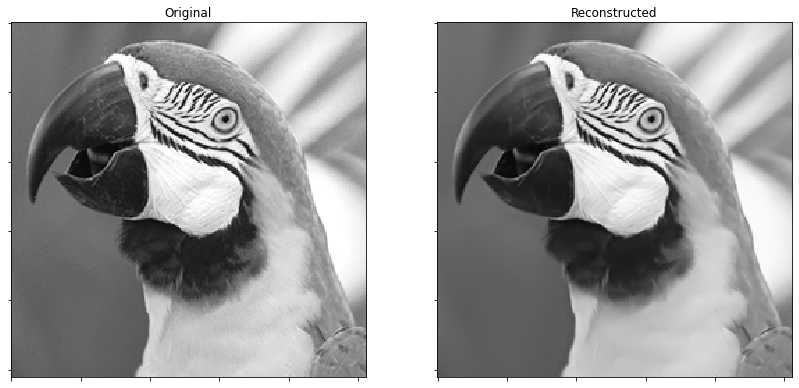

In [10]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

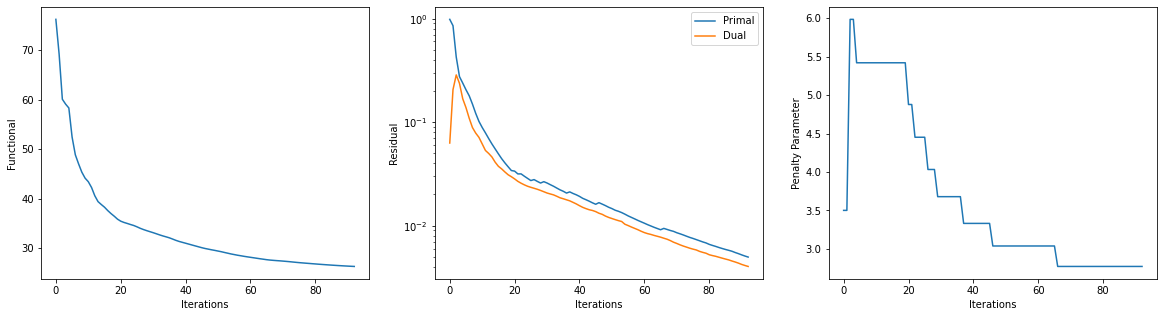

In [11]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()